In [46]:
from landslide4sense.data import LandslideDataSet
import albumentations as A
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import omegaconf
cfg = omegaconf.OmegaConf.load("../conf/config.yaml")
cfg

{'data': {'dir': '${hydra:runtime.cwd}/data/', 'train_list': '${hydra:runtime.cwd}/data/train_split_train.txt', 'eval_lists_paths': ['${hydra:runtime.cwd}/data/train_split_train.txt', '${hydra:runtime.cwd}/data/train_split_val.txt'], 'eval_names': ['train', 'val'], 'test_list': '${hydra:runtime.cwd}/data/valid.txt'}, 'model': {'input_size': '128,128', 'num_classes': 2, 'module': 'landslide4sense.models', 'name': 'Unet'}, 'train': {'run_name': 'baseline_split', 'tags': ['val_split'], 'early_stopping': {'monitor': 'val_f1', 'mode': 'max', 'patience': 3, 'best_result': 0.5}, 'steps_per_epoch': 34, 'batch_size': 100, 'num_workers': 2, 'learning_rate': 0.001, 'num_steps': 10000, 'num_steps_stop': 10000, 'weight_decay': 0.0005, 'gpu_id': 0, 'snapshot_dir': '/content/drive/MyDrive/data_science_projects/landslide4sense-2022/models/', 'restore_from': '', 'seed': 42}}

In [7]:
dataset = LandslideDataSet(
    "../data/",
    "../data/train_split_train.txt",
    max_iters=cfg.train.num_steps_stop * cfg.train.batch_size,
    set="labeled",
)

In [11]:
img, label, shape, name = next(iter(dataset))

In [24]:
img.shape

(14, 128, 128)

In [45]:
aug = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomRotate90(p=0.5),
    A.Transpose(p=0.5),
    A.RandomSizedCrop(
        min_max_height=(100, 100), 
        height=128, 
        width=128, 
        p=0.5
    )
])

augmented_channels = []

for ch in range(img.shape[0]):
    channel_img = img[ch, ...]
    augmented = aug(image=channel_img, mask=label)
    augmented_img = augmented["image"]
    mask = augmented["mask"]
    augmented_channels.append(augmented_img)

augmented_channels = np.array(augmented_channels)[np.newaxis, ...]
augmented_img = np.concatenate(augmented_channels, axis=0)

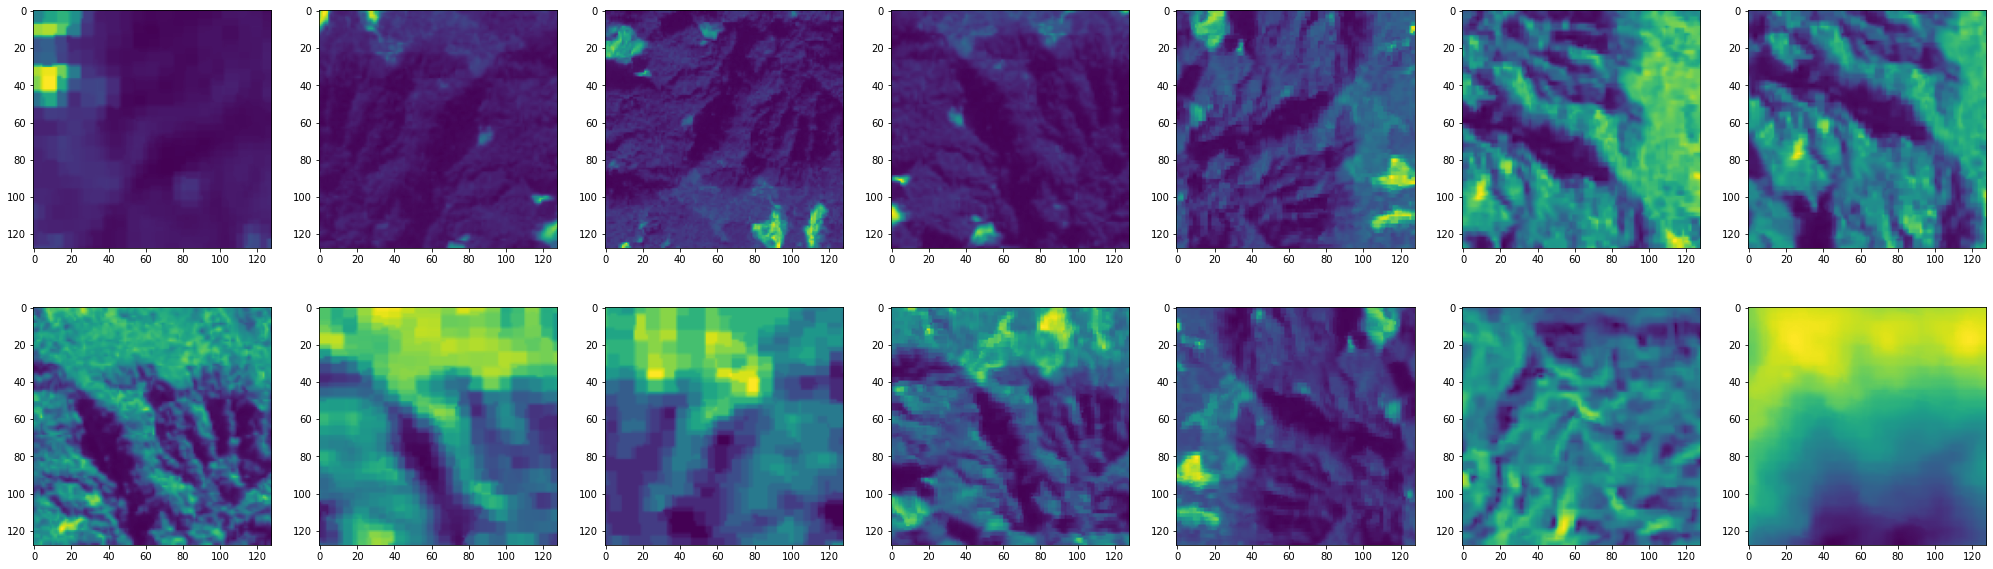

In [63]:
nrows, ncols = 2, 7
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 5*nrows)) 
k = 0

for i in range(nrows):
    for j in range(ncols):
        channel = augmented_img[k, ...]
        ax[i, j].imshow(channel)
        k += 1


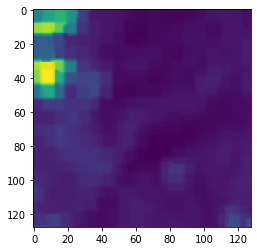

In [48]:
plt.imshow(augmented_img[0, ...])